In [1]:
# Imports
from rdflib import Graph as RDFGraph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
import networkx as nx
from networkx import Graph as NXGraph
import matplotlib.pyplot as plt
import statistics
import collections

In [2]:
rg = RDFGraph()
rg.parse('./imkg.nt', format='nt')

<Graph identifier=N9b327b2b3cd743df93149ea22cb6e84a (<class 'rdflib.graph.Graph'>)>

In [3]:
G = rdflib_to_networkx_graph(rg)

# Analysis 

## Analysis Functions

In [ ]:

def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

def number_of_pendants(g):
    """
    Equals the number of nodes with degree 1
    """
    pendants = 0
    for u in g:
        if g.degree[u] == 1:
            pendants += 1
    return pendants


def histogram(l):
    degree_sequence = sorted([d for n, d in list(l.items())], reverse=True)
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    print(deg, cnt)
    
    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')

    plt.title("Histogram")
    plt.ylabel("Count")
    plt.xlabel("Value")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)

    plt.show()

## Analysis Execution

### Network size

In [6]:
print("NETWORK SIZE")
print("============")
print("The network has {} nodes and {} edges".format(G.number_of_nodes(), G.number_of_edges()))
print()

NETWORK SIZE
The network has 23456 nodes and 109411 edges



### PENDANTS

In [7]:
print("PENDANTS")
print("============")
print("The network has {} pendants".format(number_of_pendants(G)))
print()

PENDANTS
The network has 19346 pendants



### Density

In [8]:
print("DENSITY")
print("============")
print("The network density is {}".format(nx.density(G)))
print()

DENSITY
The network density is 0.00039774212789693656



### Degree centrality -- mean and stdev

DEGREE CENTRALITY
The mean degree centrality is 0.0003977421278967637, with stdev 0.0014986306115563036
The maximum node is https://knowyourmeme.com/memes/Meme, with value 0.05985930505222767
The minimum node is ''Derogatory term for slovenly nerdy people who have no sense of hygiene or grooming. Often related to hobbies such as card gaming, video gaming, anime, et. al.'', with value 4.2634832658281814e-05
(0.05985930505222767, 0.05674696226817309, 0.03730547857599659, 0.021743764655723724, 0.014026859944574716, 0.012023022809635471, 0.011852483479002343, 0.01176721381368578, 0.011639309315710935, 0.011554039650394372, 0.01151140481773609, 0.011426135152419525, 0.011340865487102962, 0.01129823065444468, 0.0112555958217864, 0.011212960989128117, 0.011170326156469835, 0.011127691323811554, 0.011085056491153272, 0.01104242165849499, 0.010999786825836707, 0.010957151993178427, 0.010914517160520144, 0.010871882327861862, 0.010829247495203581, 0.010786612662545299, 0.010743977829887017, 0.01

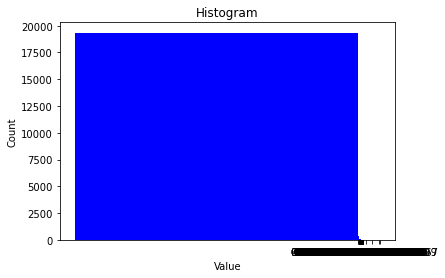

In [9]:
dc = nx.degree_centrality(G)
degrees = []
for k,v in dc.items():
    degrees.append(v)
    
print("DEGREE CENTRALITY")
print("=================")
print("The mean degree centrality is {}, with stdev {}".format(mean(degrees), statistics.stdev(degrees)))
print("The maximum node is {}, with value {}".format(max(dc, key=dc.get), max(dc.values())))
print("The minimum node is {}, with value {}".format(min(dc, key=dc.get), min(dc.values())))
histogram(dc)
print()

### Eigenvector centrality -- mean and stdev

EIGENVECTOR CENTRALITY
The mean network eigenvector centrality is 0.0007592086579724137, with stdev 0.0064852455849658
The maximum node is https://knowyourmeme.com/memes/tldr, with value 0.0687171249369757
The minimum node is http://www.wikidata.org/entity/Q105409985, with value 1.4349986769352779e-28
(0.0687171249369757, 0.06870293958036232, 0.06869628210195276, 0.06867748555424089, 0.06866564376520758, 0.06866501584317972, 0.06866155663724686, 0.06864949427115939, 0.0686455300311148, 0.06864124477018217, 0.0686383891793303, 0.06863178832518678, 0.068626968165334, 0.06862606036198941, 0.06862119157385319, 0.06862102805266734, 0.06861895891074724, 0.06861302528877633, 0.0686118704324402, 0.0686089769661234, 0.06860758965420326, 0.06860681005656977, 0.06860264412981418, 0.06860212656390556, 0.06860210149920497, 0.06859877852204087, 0.06858652725196704, 0.0685815229860358, 0.06858131595675367, 0.06858035175543545, 0.06857880599262363, 0.06857748058574031, 0.06857213048292018, 0.068571662

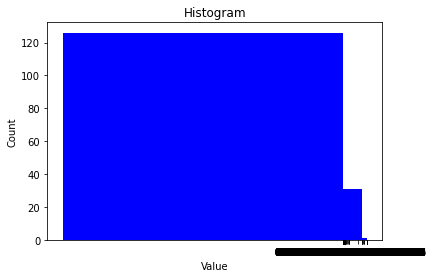

In [10]:
# Eigenvector centrality -- mean and stdev
ec = nx.eigenvector_centrality(G)
degrees = []
for k,v in ec.items():
    degrees.append(v)
    
print("EIGENVECTOR CENTRALITY")
print("======================")
print("The mean network eigenvector centrality is {}, with stdev {}".format(mean(degrees), statistics.stdev(degrees)))
print("The maximum node is {}, with value {}".format(max(ec, key=ec.get), max(ec.values())))
print("The minimum node is {}, with value {}".format(min(ec, key=ec.get), min(ec.values())))
histogram(ec)
print()

### Betweenness centrality -- mean and stdev

In [11]:
bc = nx.betweenness_centrality(G)
degrees = []
for k,v in bc.items():
    degrees.append(v)
print("BETWEENNESS CENTRALITY")
print("======================")
print("The mean betwenness centrality is {}, with stdev {}".format(mean(degrees), statistics.stdev(degrees)))
print("The maximum node is {}, with value {}".format(max(bc, key=bc.get), max(bc.values())))
print("The minimum node is {}, with value {}".format(min(bc, key=bc.get), min(bc.values())))
histogram(bc)
print()

KeyboardInterrupt: 

### Connected components

In [ ]:
cc = list(nx.connected_components(G))
print("CONNECTED COMPONENTS")
print("====================")
print("The graph has {} connected components".format(len(cc)))
for i,c in enumerate(cc):
    print("Connected component {} has {} nodes".format(i,len(c)))
print()

### Clusters

In [ ]:
cl = nx.clustering(G)
print("CLUSTERS")
print("========")
print("The graph has {} clusters".format(len(cl)))
for i,c in enumerate(cl):
    print("Cluster {} has {} nodes".format(i,len(c)))
print()

### Plot

In [ ]:
print("Visualizing the graph:")
plt.plot()
nx.draw(G, with_labels=True, font_weight='bold')